In [61]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [62]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.path.dirname(os.getcwd()))
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [63]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_cost.csv'

In [64]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0.002169,0.002252,0.002259,0.014016,0.013489,0.013201
1,0.001958,0.001952,0.001935,0.008083,0.008748,0.008287
2,0.001839,0.001852,0.001825,0.003785,0.003837,0.003679
3,0.001764,0.001767,0.001734,0.003812,0.003702,0.003529
4,0.001863,0.001864,0.001819,0.004304,0.004171,0.003961


In [65]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.002169,0.002252,0.002259,0.014016,0.013489,0.013201
1,1,0.001958,0.001952,0.001935,0.008083,0.008748,0.008287
2,2,0.001839,0.001852,0.001825,0.003785,0.003837,0.003679
3,3,0.001764,0.001767,0.001734,0.003812,0.003702,0.003529
4,4,0.001863,0.001864,0.001819,0.004304,0.004171,0.003961


In [66]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.002169,0.002252,0.002259,0.014016,0.013489,0.013201
1,1,0.001958,0.001952,0.001935,0.008083,0.008748,0.008287
2,2,0.001839,0.001852,0.001825,0.003785,0.003837,0.003679
3,3,0.001764,0.001767,0.001734,0.003812,0.003702,0.003529
4,4,0.001863,0.001864,0.001819,0.004304,0.004171,0.003961


In [67]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,1,0.002169,0.002252,0.002259,0.014016,0.013489,0.013201
1,2,0.001958,0.001952,0.001935,0.008083,0.008748,0.008287
2,3,0.001839,0.001852,0.001825,0.003785,0.003837,0.003679
3,4,0.001764,0.001767,0.001734,0.003812,0.003702,0.003529
4,5,0.001863,0.001864,0.001819,0.004304,0.004171,0.003961


In [68]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_hypothesis'], axis=1)
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_training_baseline,cost_validation_baseline
0,1,0.002169,0.002252,0.014016,0.013489
1,2,0.001958,0.001952,0.008083,0.008748
2,3,0.001839,0.001852,0.003785,0.003837
3,4,0.001764,0.001767,0.003812,0.003702
4,5,0.001863,0.001864,0.004304,0.004171


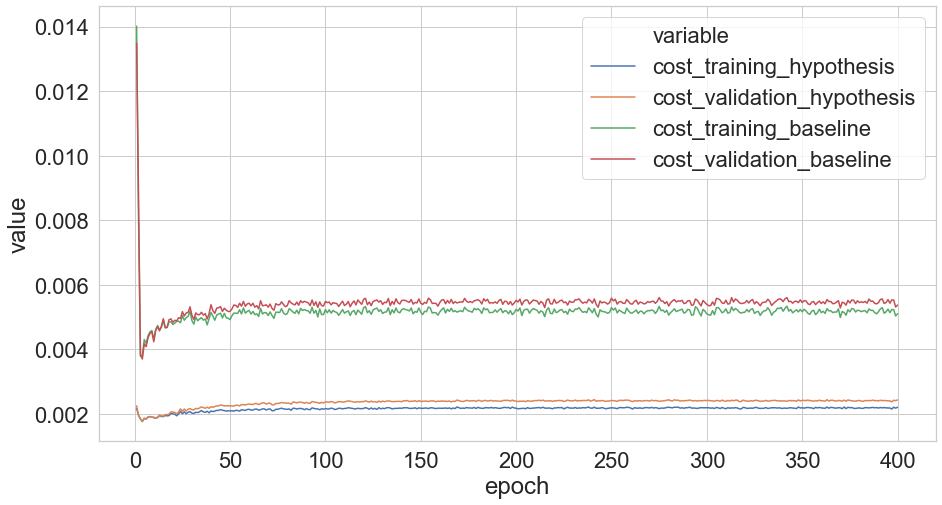

In [69]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost, ['epoch']))
plt.savefig('FB15k-237_Cost_Results.png', bbox_inches = "tight", format='PNG')

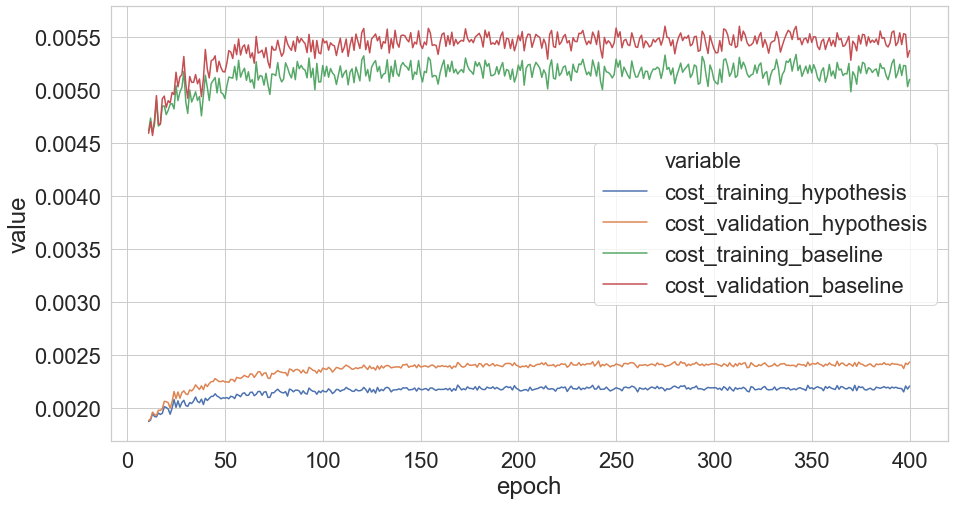

In [70]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[10:], ['epoch']))
plt.savefig('FB15k-237_Cost_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [71]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_hits_at_10.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_hits_at_10.csv'

In [72]:
results_hits_at_10 = pd.read_csv(path)
results_hits_at_10.head()

,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0.120445,0.119646,0.121030,0.065526,0.065469,0.065132
1,0.199772,0.217223,0.226278,0.100884,0.104477,0.102169
2,0.248988,0.268064,0.278853,0.268663,0.274280,0.283324
3,0.299316,0.316938,0.328887,0.386427,0.346478,0.359743
4,0.352980,0.348332,0.363505,0.503849,0.391816,0.407236


In [73]:
results_hits_at_10 = results_hits_at_10.reset_index()
results_hits_at_10.head()

,index,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.120445,0.119646,0.121030,0.065526,0.065469,0.065132
1,1,0.199772,0.217223,0.226278,0.100884,0.104477,0.102169
2,2,0.248988,0.268064,0.278853,0.268663,0.274280,0.283324
3,3,0.299316,0.316938,0.328887,0.386427,0.346478,0.359743
4,4,0.352980,0.348332,0.363505,0.503849,0.391816,0.407236


In [74]:
results_hits_at_10 = results_hits_at_10.rename(columns={'index': 'epoch'})
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.120445,0.119646,0.121030,0.065526,0.065469,0.065132
1,1,0.199772,0.217223,0.226278,0.100884,0.104477,0.102169
2,2,0.248988,0.268064,0.278853,0.268663,0.274280,0.283324
3,3,0.299316,0.316938,0.328887,0.386427,0.346478,0.359743
4,4,0.352980,0.348332,0.363505,0.503849,0.391816,0.407236


In [75]:
results_hits_at_10['epoch'] += 1
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,1,0.120445,0.119646,0.121030,0.065526,0.065469,0.065132
1,2,0.199772,0.217223,0.226278,0.100884,0.104477,0.102169
2,3,0.248988,0.268064,0.278853,0.268663,0.274280,0.283324
3,4,0.299316,0.316938,0.328887,0.386427,0.346478,0.359743
4,5,0.352980,0.348332,0.363505,0.503849,0.391816,0.407236


In [76]:
results_hits_at_10_test = results_hits_at_10[['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis']]
results_hits_at_10_test.head()

,hits_at_10_test_baseline,hits_at_10_test_hypothesis
0,0.065132,0.121030
1,0.102169,0.226278
2,0.283324,0.278853
3,0.359743,0.328887
4,0.407236,0.363505


In [77]:
results_hits_at_10_test.max()

hits_at_10_test_baseline      0.505717
hits_at_10_test_hypothesis    0.523576
dtype: float64

In [78]:
results_hits_at_10 = results_hits_at_10.drop(['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis'], axis=1)
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline
0,1,0.120445,0.119646,0.065526,0.065469
1,2,0.199772,0.217223,0.100884,0.104477
2,3,0.248988,0.268064,0.268663,0.274280
3,4,0.299316,0.316938,0.386427,0.346478
4,5,0.352980,0.348332,0.503849,0.391816


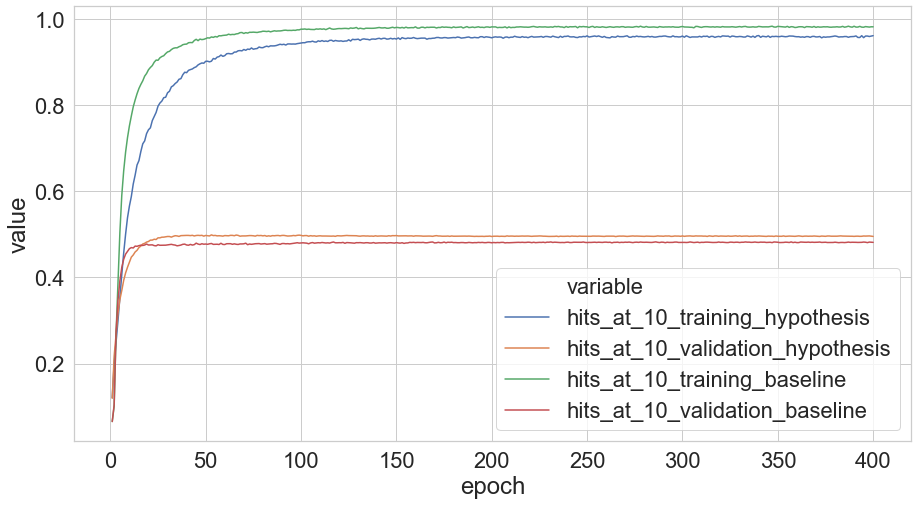

In [79]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10, ['epoch']))
plt.savefig('FB15k-237_hits_at_10_Results.png', bbox_inches = "tight", format='PNG')

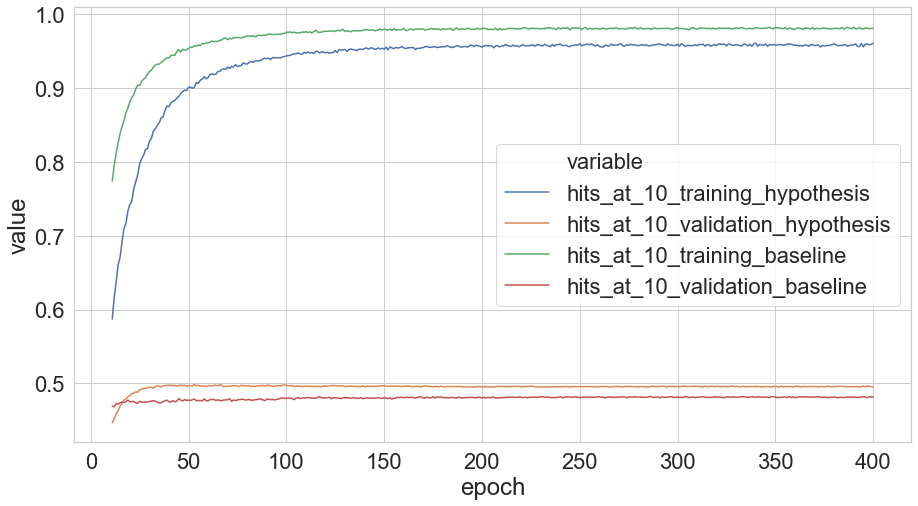

In [80]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[10:], ['epoch']))
plt.savefig('FB15k-237_hits_at_10_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [81]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_hits_at_3.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_hits_at_3.csv'

In [82]:
results_hits_at_3 = pd.read_csv(path)
results_hits_at_3.head()

,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0.080125,0.077017,0.078740,0.035729,0.028628,0.030245
1,0.125691,0.135757,0.145021,0.061848,0.063216,0.061468
2,0.159338,0.173196,0.188679,0.178586,0.186085,0.197816
3,0.193898,0.209524,0.226595,0.256459,0.234902,0.249878
4,0.231822,0.232735,0.255008,0.346450,0.262275,0.286353


In [83]:
results_hits_at_3 = results_hits_at_3.reset_index()
results_hits_at_3.head()

,index,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.080125,0.077017,0.078740,0.035729,0.028628,0.030245
1,1,0.125691,0.135757,0.145021,0.061848,0.063216,0.061468
2,2,0.159338,0.173196,0.188679,0.178586,0.186085,0.197816
3,3,0.193898,0.209524,0.226595,0.256459,0.234902,0.249878
4,4,0.231822,0.232735,0.255008,0.346450,0.262275,0.286353


In [84]:
results_hits_at_3 = results_hits_at_3.rename(columns={'index': 'epoch'})
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.080125,0.077017,0.078740,0.035729,0.028628,0.030245
1,1,0.125691,0.135757,0.145021,0.061848,0.063216,0.061468
2,2,0.159338,0.173196,0.188679,0.178586,0.186085,0.197816
3,3,0.193898,0.209524,0.226595,0.256459,0.234902,0.249878
4,4,0.231822,0.232735,0.255008,0.346450,0.262275,0.286353


In [85]:
results_hits_at_3['epoch'] += 1
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,1,0.080125,0.077017,0.078740,0.035729,0.028628,0.030245
1,2,0.125691,0.135757,0.145021,0.061848,0.063216,0.061468
2,3,0.159338,0.173196,0.188679,0.178586,0.186085,0.197816
3,4,0.193898,0.209524,0.226595,0.256459,0.234902,0.249878
4,5,0.231822,0.232735,0.255008,0.346450,0.262275,0.286353


In [86]:
results_hits_at_3_test = results_hits_at_3[['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis']]
results_hits_at_3_test.head()

,hits_at_3_test_baseline,hits_at_3_test_hypothesis
0,0.030245,0.078740
1,0.061468,0.145021
2,0.197816,0.188679
3,0.249878,0.226595
4,0.286353,0.255008


In [87]:
results_hits_at_3_test.max()

hits_at_3_test_baseline      0.357153
hits_at_3_test_hypothesis    0.376112
dtype: float64

In [88]:
results_hits_at_3 = results_hits_at_3.drop(['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis'], axis=1)
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline
0,1,0.080125,0.077017,0.035729,0.028628
1,2,0.125691,0.135757,0.061848,0.063216
2,3,0.159338,0.173196,0.178586,0.186085
3,4,0.193898,0.209524,0.256459,0.234902
4,5,0.231822,0.232735,0.346450,0.262275


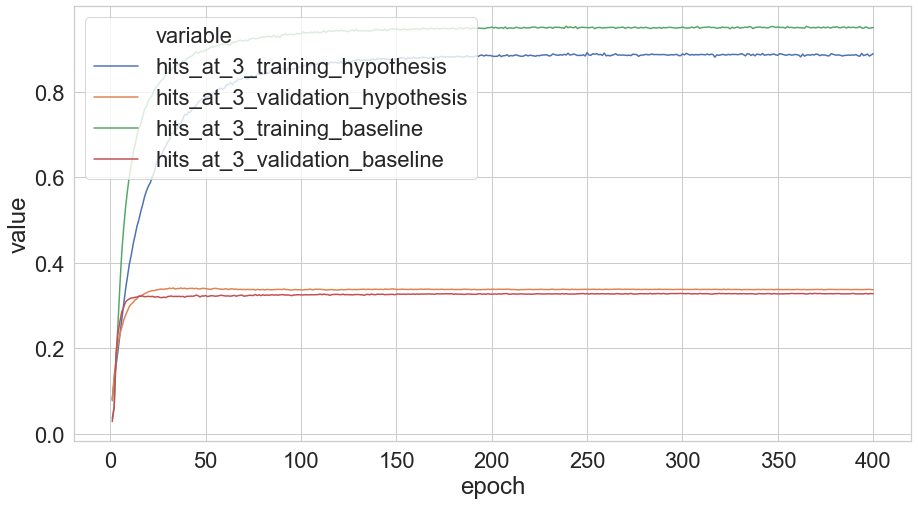

In [89]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3, ['epoch']))
plt.savefig('FB15k-237_hits_at_3_Results.png', bbox_inches = "tight", format='PNG')

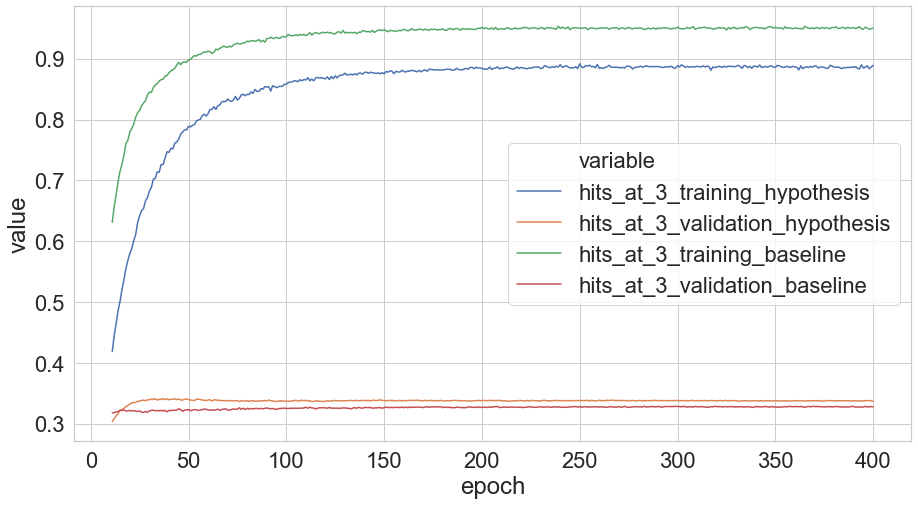

In [90]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[10:], ['epoch']))
plt.savefig('FB15k-237_hits_at_3_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [91]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_hits_at_1.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_hits_at_1.csv'

In [92]:
results_hits_at_1 = pd.read_csv(path)
results_hits_at_1.head()

,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0.052695,0.050071,0.051695,0.017479,0.013373,0.014292
1,0.074423,0.078814,0.085703,0.043684,0.044397,0.043145
2,0.096949,0.106102,0.119833,0.111520,0.120787,0.130192
3,0.121928,0.132050,0.151422,0.148360,0.146963,0.164932
4,0.140633,0.145509,0.168646,0.197747,0.162874,0.189436


In [93]:
results_hits_at_1 = results_hits_at_1.reset_index()
results_hits_at_1.head()

,index,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.052695,0.050071,0.051695,0.017479,0.013373,0.014292
1,1,0.074423,0.078814,0.085703,0.043684,0.044397,0.043145
2,2,0.096949,0.106102,0.119833,0.111520,0.120787,0.130192
3,3,0.121928,0.132050,0.151422,0.148360,0.146963,0.164932
4,4,0.140633,0.145509,0.168646,0.197747,0.162874,0.189436


In [94]:
results_hits_at_1 = results_hits_at_1.rename(columns={'index': 'epoch'})
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.052695,0.050071,0.051695,0.017479,0.013373,0.014292
1,1,0.074423,0.078814,0.085703,0.043684,0.044397,0.043145
2,2,0.096949,0.106102,0.119833,0.111520,0.120787,0.130192
3,3,0.121928,0.132050,0.151422,0.148360,0.146963,0.164932
4,4,0.140633,0.145509,0.168646,0.197747,0.162874,0.189436


In [95]:
results_hits_at_1['epoch'] += 1
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,1,0.052695,0.050071,0.051695,0.017479,0.013373,0.014292
1,2,0.074423,0.078814,0.085703,0.043684,0.044397,0.043145
2,3,0.096949,0.106102,0.119833,0.111520,0.120787,0.130192
3,4,0.121928,0.132050,0.151422,0.148360,0.146963,0.164932
4,5,0.140633,0.145509,0.168646,0.197747,0.162874,0.189436


In [96]:
results_hits_at_1_test = results_hits_at_1[['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis']]
results_hits_at_1_test.head()

,hits_at_1_test_baseline,hits_at_1_test_hypothesis
0,0.014292,0.051695
1,0.043145,0.085703
2,0.130192,0.119833
3,0.164932,0.151422
4,0.189436,0.168646


In [97]:
results_hits_at_1_test.max()

hits_at_1_test_baseline      0.239031
hits_at_1_test_hypothesis    0.251637
dtype: float64

In [98]:
results_hits_at_1 = results_hits_at_1.drop(['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis'], axis=1)
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline
0,1,0.052695,0.050071,0.017479,0.013373
1,2,0.074423,0.078814,0.043684,0.044397
2,3,0.096949,0.106102,0.111520,0.120787
3,4,0.121928,0.132050,0.148360,0.146963
4,5,0.140633,0.145509,0.197747,0.162874


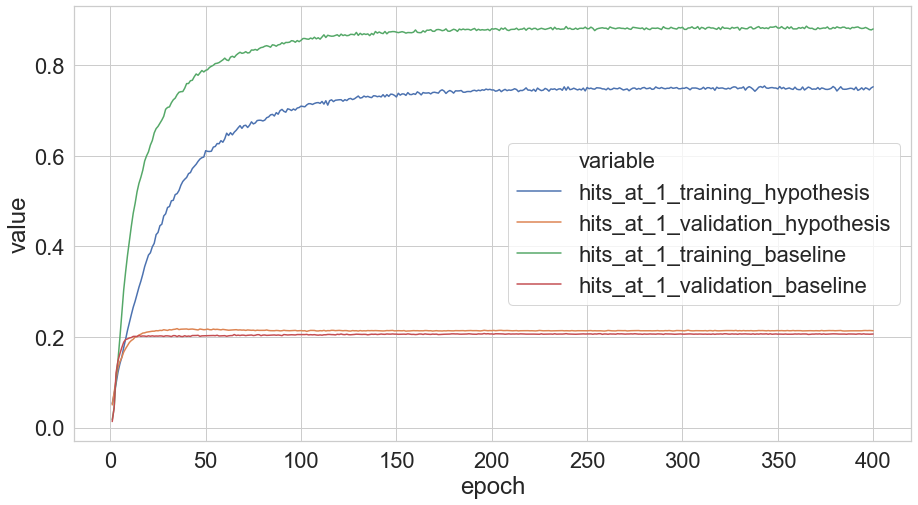

In [99]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1, ['epoch']))
plt.savefig('FB15k-237_hits_at_1_Results.png', bbox_inches = "tight", format='PNG')

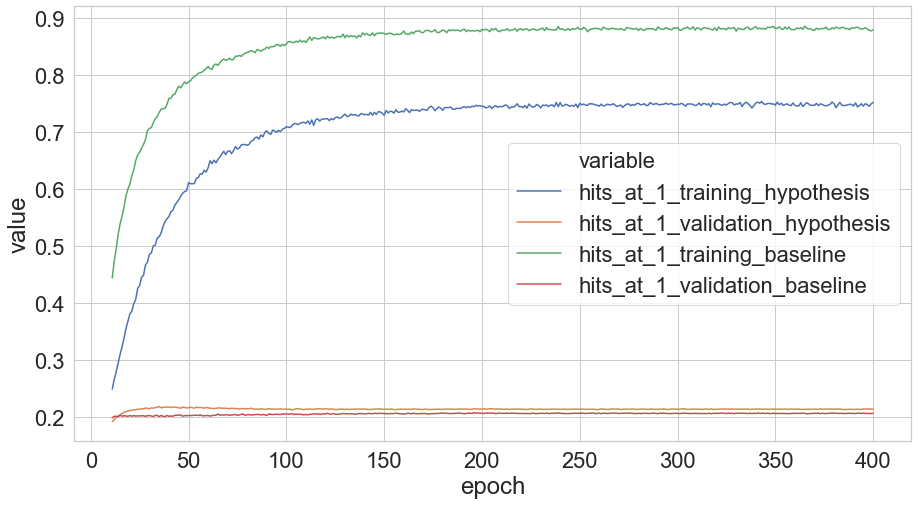

In [100]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[10:], ['epoch']))
plt.savefig('FB15k-237_hits_at_1_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [101]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_mean_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_mean_rank.csv'

In [102]:
results_mean_rank = pd.read_csv(path)
results_mean_rank.head()

,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,3212.120217,3240.578871,3207.164590,3792.562504,4015.877958,4003.909973
1,1709.565184,1745.482977,1714.184061,2675.154919,3066.281779,3102.594058
2,919.143171,1007.483918,1001.024773,1091.448931,1437.289279,1452.088610
3,452.533961,557.801169,558.943809,443.152780,692.105446,696.885933
4,314.346051,441.006758,437.151837,203.602310,414.174907,408.667546


In [103]:
results_mean_rank = results_mean_rank.reset_index()
results_mean_rank.head()

,index,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,3212.120217,3240.578871,3207.164590,3792.562504,4015.877958,4003.909973
1,1,1709.565184,1745.482977,1714.184061,2675.154919,3066.281779,3102.594058
2,2,919.143171,1007.483918,1001.024773,1091.448931,1437.289279,1452.088610
3,3,452.533961,557.801169,558.943809,443.152780,692.105446,696.885933
4,4,314.346051,441.006758,437.151837,203.602310,414.174907,408.667546


In [104]:
results_mean_rank = results_mean_rank.rename(columns={'index': 'epoch'})
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,3212.120217,3240.578871,3207.164590,3792.562504,4015.877958,4003.909973
1,1,1709.565184,1745.482977,1714.184061,2675.154919,3066.281779,3102.594058
2,2,919.143171,1007.483918,1001.024773,1091.448931,1437.289279,1452.088610
3,3,452.533961,557.801169,558.943809,443.152780,692.105446,696.885933
4,4,314.346051,441.006758,437.151837,203.602310,414.174907,408.667546


In [105]:
results_mean_rank['epoch'] += 1
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,1,3212.120217,3240.578871,3207.164590,3792.562504,4015.877958,4003.909973
1,2,1709.565184,1745.482977,1714.184061,2675.154919,3066.281779,3102.594058
2,3,919.143171,1007.483918,1001.024773,1091.448931,1437.289279,1452.088610
3,4,452.533961,557.801169,558.943809,443.152780,692.105446,696.885933
4,5,314.346051,441.006758,437.151837,203.602310,414.174907,408.667546


In [106]:
results_mean_rank_test = results_mean_rank[['mean_rank_test_baseline', 'mean_rank_test_hypothesis']]
results_mean_rank_test.head()

,mean_rank_test_baseline,mean_rank_test_hypothesis
0,4003.909973,3207.164590
1,3102.594058,1714.184061
2,1452.088610,1001.024773
3,696.885933,558.943809
4,408.667546,437.151837


In [107]:
results_mean_rank_test.min()

mean_rank_test_baseline      294.492817
mean_rank_test_hypothesis    212.774089
dtype: float64

In [108]:
results_mean_rank = results_mean_rank.drop(['mean_rank_test_baseline', 'mean_rank_test_hypothesis'], axis=1)
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline
0,1,3212.120217,3240.578871,3792.562504,4015.877958
1,2,1709.565184,1745.482977,2675.154919,3066.281779
2,3,919.143171,1007.483918,1091.448931,1437.289279
3,4,452.533961,557.801169,443.152780,692.105446
4,5,314.346051,441.006758,203.602310,414.174907


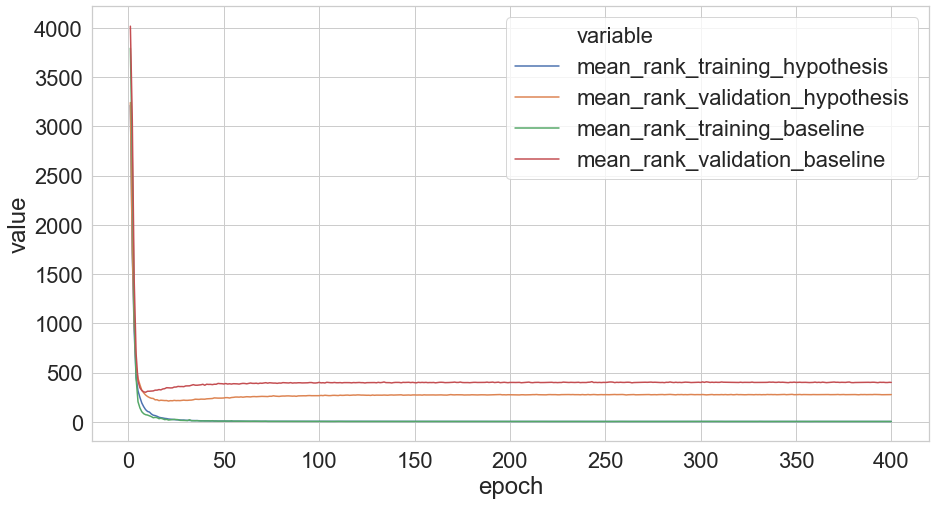

In [109]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank, ['epoch']))
plt.savefig('FB15k-237_mean_rank_Results.png', bbox_inches = "tight", format='PNG')

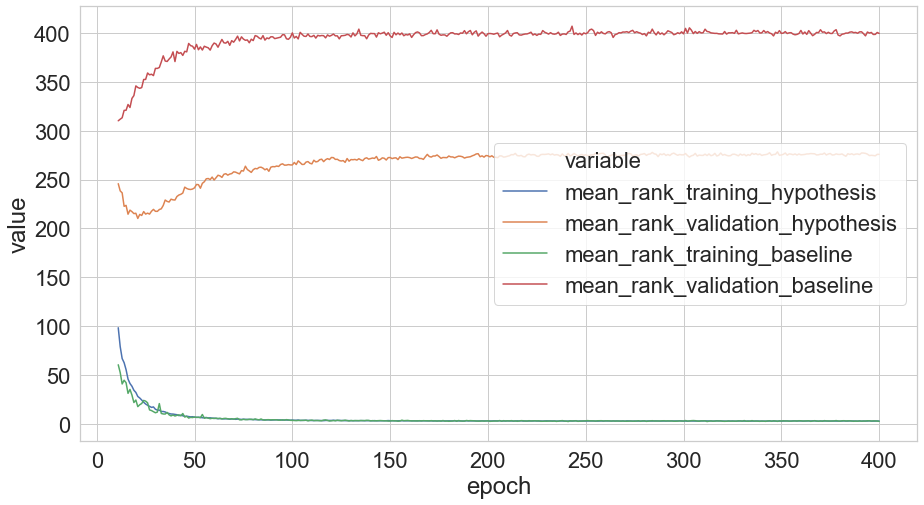

In [110]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[10:], ['epoch']))
plt.savefig('FB15k-237_mean_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [111]:
path = get_path('hntn_train_validate_and_test_fb15k_237_200d_mean_reciprocal_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Pretrained-Word-Vectors/results/hntn_train_validate_and_test_fb15k_237_200d_mean_reciprocal_rank.csv'

In [112]:
results_mean_reciprocal_rank = pd.read_csv(path)
results_mean_reciprocal_rank.head()

,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0.076004,0.073465,0.075045,0.033765,0.029966,0.030768
1,0.116562,0.124932,0.132622,0.063162,0.064642,0.063132
2,0.148853,0.160672,0.174041,0.164785,0.172354,0.182044
3,0.182125,0.193929,0.211200,0.228605,0.213885,0.230124
4,0.212380,0.213580,0.234901,0.301452,0.238810,0.262629


In [113]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.reset_index()
results_mean_reciprocal_rank.head()

,index,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.076004,0.073465,0.075045,0.033765,0.029966,0.030768
1,1,0.116562,0.124932,0.132622,0.063162,0.064642,0.063132
2,2,0.148853,0.160672,0.174041,0.164785,0.172354,0.182044
3,3,0.182125,0.193929,0.211200,0.228605,0.213885,0.230124
4,4,0.212380,0.213580,0.234901,0.301452,0.238810,0.262629


In [114]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.rename(columns={'index': 'epoch'})
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.076004,0.073465,0.075045,0.033765,0.029966,0.030768
1,1,0.116562,0.124932,0.132622,0.063162,0.064642,0.063132
2,2,0.148853,0.160672,0.174041,0.164785,0.172354,0.182044
3,3,0.182125,0.193929,0.211200,0.228605,0.213885,0.230124
4,4,0.212380,0.213580,0.234901,0.301452,0.238810,0.262629


In [115]:
results_mean_reciprocal_rank['epoch'] += 1
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,1,0.076004,0.073465,0.075045,0.033765,0.029966,0.030768
1,2,0.116562,0.124932,0.132622,0.063162,0.064642,0.063132
2,3,0.148853,0.160672,0.174041,0.164785,0.172354,0.182044
3,4,0.182125,0.193929,0.211200,0.228605,0.213885,0.230124
4,5,0.212380,0.213580,0.234901,0.301452,0.238810,0.262629


In [116]:
results_mean_reciprocal_rank_test = results_mean_reciprocal_rank[['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis']]
results_mean_reciprocal_rank_test.head()

,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_test_hypothesis
0,0.030768,0.075045
1,0.063132,0.132622
2,0.182044,0.174041
3,0.230124,0.211200
4,0.262629,0.234901


In [117]:
results_mean_reciprocal_rank_test.max()

mean_reciprocal_rank_test_baseline      0.326164
mean_reciprocal_rank_test_hypothesis    0.341648
dtype: float64

In [118]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.drop(['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis'], axis=1)
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline
0,1,0.076004,0.073465,0.033765,0.029966
1,2,0.116562,0.124932,0.063162,0.064642
2,3,0.148853,0.160672,0.164785,0.172354
3,4,0.182125,0.193929,0.228605,0.213885
4,5,0.212380,0.213580,0.301452,0.238810


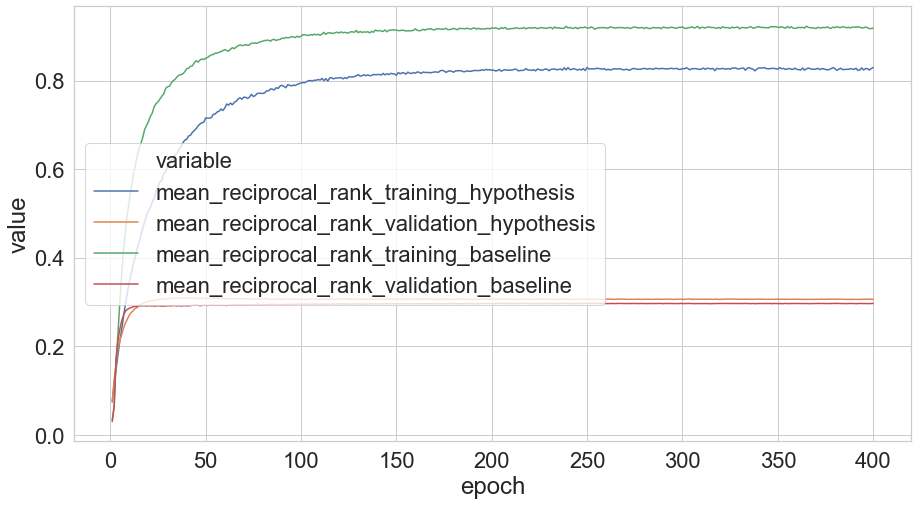

In [119]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank, ['epoch']))
plt.savefig('FB15k-237_mean_reciprocal_rank_Results.png', bbox_inches = "tight", format='PNG')

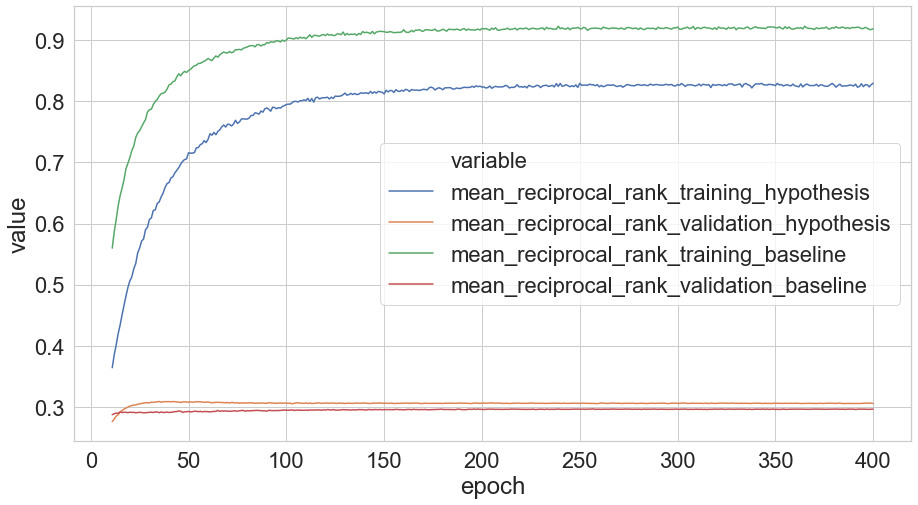

In [120]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[10:], ['epoch']))
plt.savefig('FB15k-237_mean_reciprocal_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')